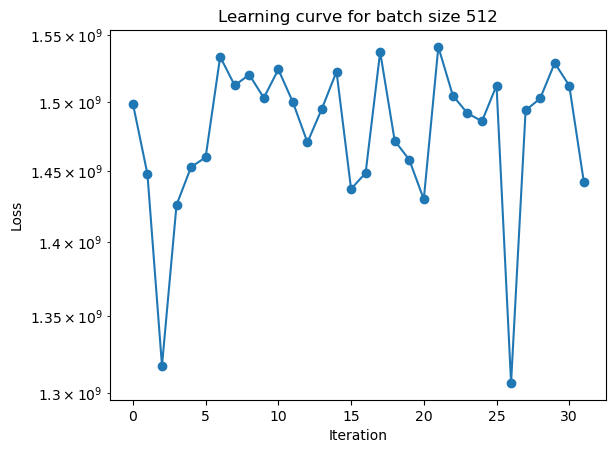

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output  # Correct import

# Function definitions
def model(x, m, b):
    return m * x + b

def loss(x, y, m, b):
    y_predicted = model(x, m, b)
    return np.power(y - y_predicted, 2)

def updated_m(x, y, m, b, learning_rate):
    dL_dm = -2 * x * (y - model(x, m, b))
    dL_dm = np.mean(dL_dm)
    return m - learning_rate * dL_dm

def updated_b(x, y, m, b, learning_rate):
    dL_db = -2 * (y - model(x, m, b))
    dL_db = np.mean(dL_db)
    return b - learning_rate * dL_db

def plot_data(x, y, m, b, ax=None):
    if ax is None:
        plt.plot(x, y, 'bo')
        linear_x = np.arange(x.min(), x.max())
        linear_y = linear_x * m + b
        plt.plot(linear_x, linear_y, 'r-', label='fit')
        plt.legend()
        plt.show()
    else:
        ax.plot(x, y, 'bo')
        linear_x = np.arange(x.min(), x.max())
        linear_y = linear_x * m + b
        ax.plot(linear_x, linear_y, 'r-', label='fit')
        ax.legend()

# Load dataset
data = pd.read_csv('slimmed_realestate_data.csv')

# Initialize parameters
m = 5.
b = 1000.
learning_rate_m = 1e-7
learning_rate_b = 1e-1
batch_sizes = [32, 64, 128, 256, 512]
epochs = 30

# Loop over different batch sizes
for batch_size in batch_sizes:
    loss_history = []
    loop_N = epochs * len(data) // batch_size

    # Mini-batch training loop
    for i in range(loop_N):
        data_batch = data.sample(batch_size)
        data_x = data_batch['GrLivArea'].to_numpy()
        data_y = data_batch['SalePrice'].to_numpy()

        # Update slope and intercept
        m = updated_m(data_x, data_y, m, b, learning_rate_m)
        b = updated_b(data_x, data_y, m, b, learning_rate_b)

        # Calculate loss
        loss_value = np.mean(loss(data_x, data_y, m, b))
        loss_history.append(loss_value)

        # Plotting
        if i % (loop_N // epochs) == 0:  # plot every epoch
            plt.close('all')
            fig, ax = plt.subplots(1, 2, figsize=(18, 6), dpi=80)
            plot_data(data_x, data_y, m, b, ax[0])

            # Plot the loss history
            loss_x = np.arange(0, len(loss_history))
            loss_y = np.asarray(loss_history)
            ax[1].plot(loss_x, loss_y, 'o-')
            ax[1].set_yscale('log')
            ax[1].set_xlabel('Iteration')
            ax[1].set_ylabel('Loss')
            plt.show()

            time.sleep(1.5)  # Wait to view the plot
            clear_output(wait=True)  # Correct function to clear the output

    # Plot final loss history for this batch size
    plt.figure()
    plt.plot(loss_history, 'o-')
    plt.yscale('log')
    plt.title(f'Learning curve for batch size {batch_size}')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.show()
